In [1]:
from fastai.vision import *

In [3]:
strings_path = Path('../data/strings')

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path=strings_path,
                                  train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(),
                                  size=224,
                                  num_workers=4).normalize(imagenet_stats)

In [5]:
model = create_cnn(data, models.resnet34, metrics=error_rate)

In [6]:
model.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (365 items)
[Category cello, Category cello, Category cello, Category cello, Category cello]...
Path: ../data/strings
x: ImageItemList (365 items)
[Image (3, 263, 500), Image (3, 483, 267), Image (3, 375, 500), Image (3, 425, 425), Image (3, 500, 333)]...
Path: ../data/strings;

Valid: LabelList
y: CategoryList (91 items)
[Category double_bass, Category cello, Category violin, Category viola, Category viola]...
Path: ../data/strings
x: ImageItemList (91 items)
[Image (3, 500, 231), Image (3, 352, 500), Image (3, 280, 500), Image (3, 176, 500), Image (3, 500, 308)]...
Path: ../data/strings;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4):

In [7]:
model.export()

In [8]:
defaults.device = torch.device('cpu')

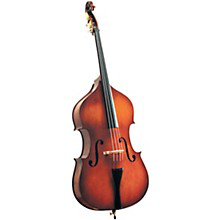

In [12]:
img = open_image(strings_path/'double_bass'/'00000001.jpg')
img

In [13]:
learn = load_learner(strings_path)

In [15]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category double_bass